In [24]:
%matplotlib inline

from double_qnet import *
import tensorflow as tf
import pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib._png import read_png

In [2]:
import matplotlib.cm as cm

In [3]:
sess = tf.Session()
sess.run(tf.initialize_all_variables())

In [4]:
f = open('../data/color/transitions.pickle', 'r')
to_restore = pickle.load(f)
f.close()

In [5]:
frame_count, transitions = to_restore['frame_count'], to_restore['transitions']

In [6]:
print frame_count
sa, ta, aa, ra, spa = transitions.get_minibatch(frame_count)

foo = sess.run(r_h_fc1, feed_dict={s: sa})

40000
10000


In [8]:
model = TSNE()
transformed = model.fit_transform(foo)

In [94]:
for i in range(len(sa)):
    if transformed[i,0]<-10 and transformed[i,1]>0:
        print i

63
80
532
620
1212
1455
1463
1580
1858
1950
2030
2054
2079
2088
2530
2546
2614
2640
2682
3006
3357
3493
3616
3703
3878
3887
3969
4029
4146
4281
4460
4758
4898
4909
4931
4954
5049
5545
5548
5883
5898
5925
5998
6045
6047
6323
6625
6925
7023
7306
7308
7419
7690
7861
8122
8176
8370
8482
8507
8570
8737
8760
9010
9086
9137
9419
9437
9958


(800.0, 1600.0)
237.56607073
-8.42058722032


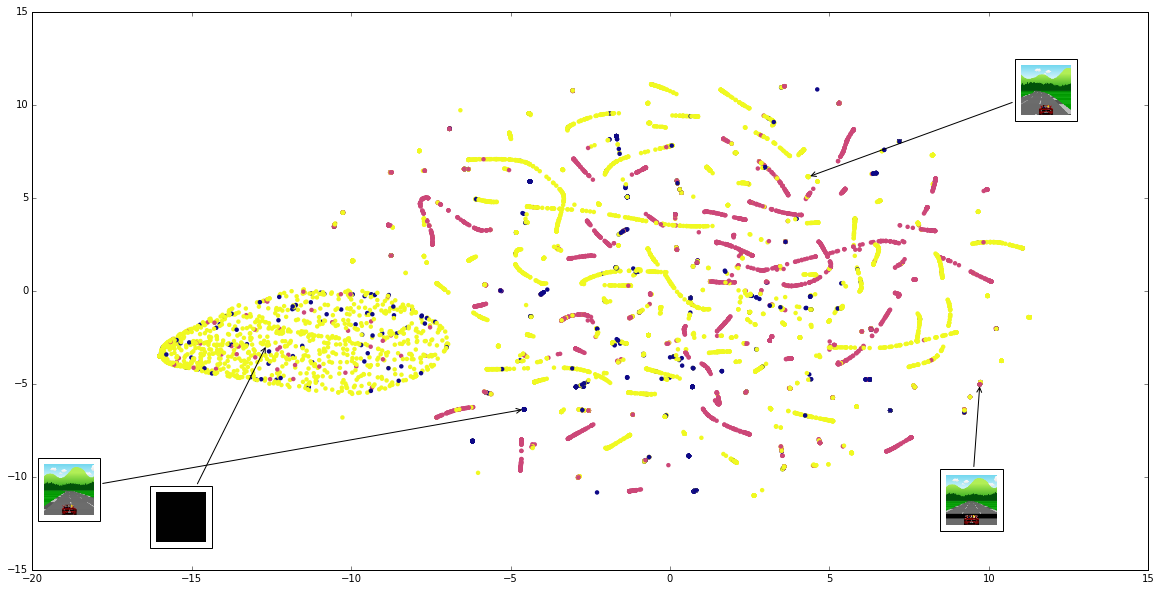

In [100]:
fig, ax = plt.subplots(figsize=(20,10))

max_height = 10*fig.dpi
max_width=20*fig.dpi

print (max_height, max_width)

x_pixels=max_width / float(35)
y_pixels = max_height / float(30)

indexes = [9832, 6794,32, 120]
for i in indexes:
    imagebox=OffsetImage(255 - sa[i][:,:,:], zoom=0.6)

# arr_lena = read_png('../architecture.png')
# imagebox = OffsetImage(arr_lena, zoom=0.2)

    xy=(transformed[i,0],transformed[i,1])

    if xy[0] <= 0:
        offset_x = 0-(xy[0]+20) * x_pixels + 250
    else:
        offset_x = max_width-(xy[0]+20)*x_pixels-250
        print offset_x
        
    if xy[1] <= 0:
        offset_y = 0-(xy[1]+15)*y_pixels+150
    else:
        offset_y = max_height-(xy[1]+15)*y_pixels-150
    
    offset = (offset_x,offset_y)
    
    ab = AnnotationBbox(imagebox, xy,
                        xybox=offset,
                        xycoords='data',
                        boxcoords='offset points',
                        pad=0.5,
                        arrowprops=dict(arrowstyle="->"),
                       )
    ax.add_artist(ab)

# plt.figure(figsize=(20, 10))
ax.scatter(transformed[:, 0], transformed[:, 1], c=aa, cmap="plasma", lw=0)
plt.draw()
plt.show()

(800.0, 1600.0)
237.56607073
-8.42058722032


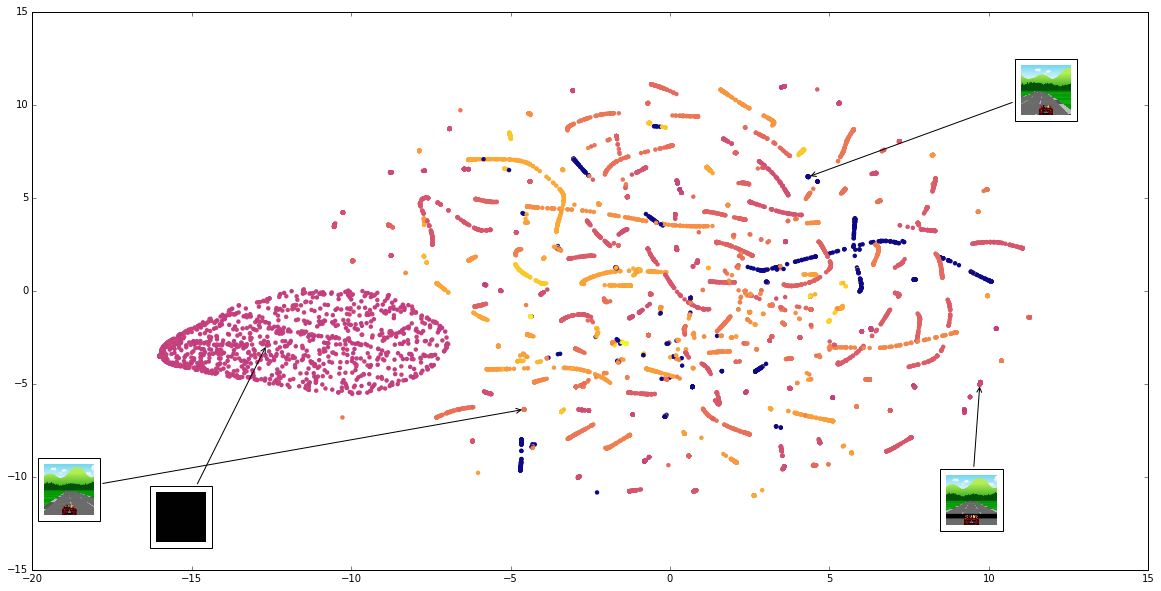

In [101]:
fig, ax = plt.subplots(figsize=(20,10))

max_height = 10*fig.dpi
max_width=20*fig.dpi

print (max_height, max_width)

x_pixels=max_width / float(35)
y_pixels = max_height / float(30)

for i in indexes:
    imagebox=OffsetImage(255 - sa[i][:,:,:], zoom=0.6)

# arr_lena = read_png('../architecture.png')
# imagebox = OffsetImage(arr_lena, zoom=0.2)

    xy=(transformed[i,0],transformed[i,1])

    if xy[0] <= 0:
        offset_x = 0-(xy[0]+20) * x_pixels + 250
    else:
        offset_x = max_width-(xy[0]+20)*x_pixels-250
        print offset_x
        
    if xy[1] <= 0:
        offset_y = 0-(xy[1]+15)*y_pixels+150
    else:
        offset_y = max_height-(xy[1]+15)*y_pixels-150
    
    offset = (offset_x,offset_y)
    
    ab = AnnotationBbox(imagebox, xy,
                        xybox=offset,
                        xycoords='data',
                        boxcoords='offset points',
                        pad=0.5,
                        arrowprops=dict(arrowstyle="->"),
                       )
    ax.add_artist(ab)

# plt.figure(figsize=(20, 10))
ax.scatter(transformed[:, 0], transformed[:, 1], c=ra, cmap="plasma", lw=0)
plt.draw()
plt.show()

(84, 84, 3)


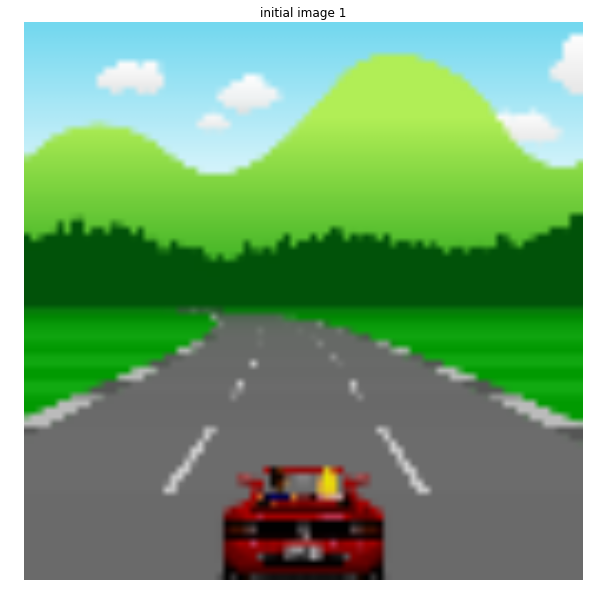

(84, 84, 3)


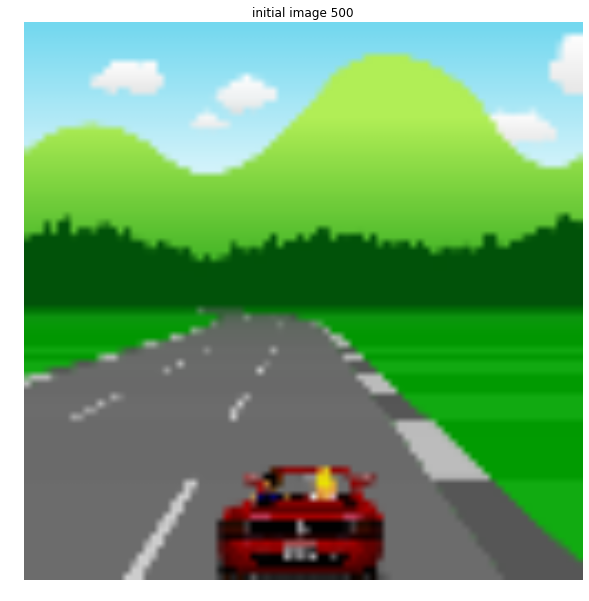

(84, 84, 3)


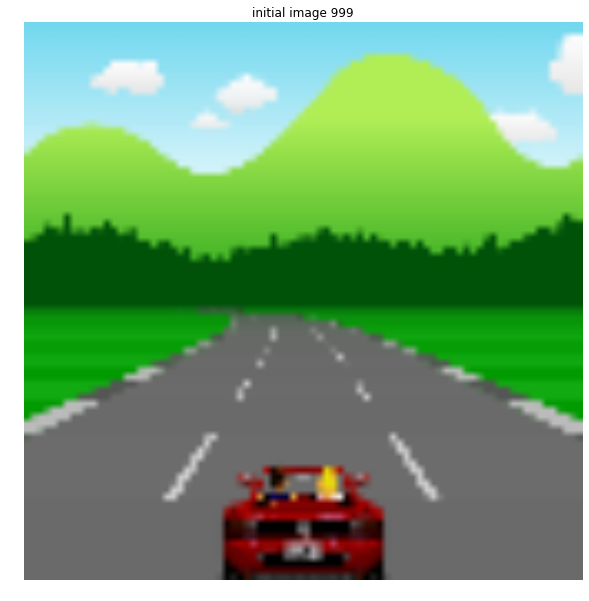

(84, 84, 3)


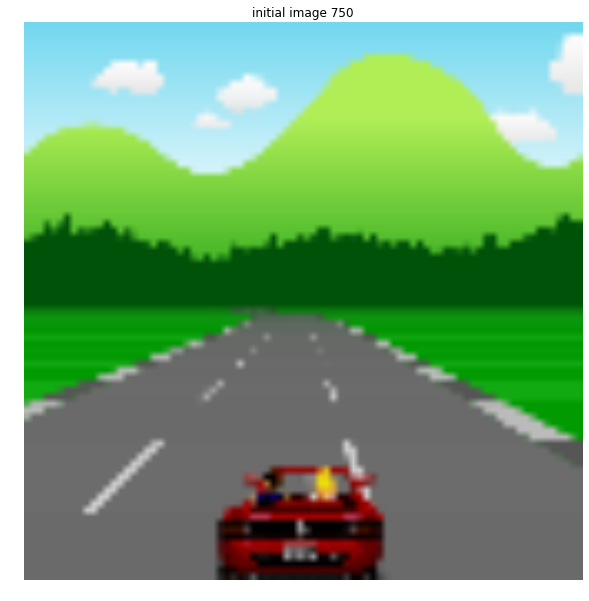

In [50]:
indexes = [1, 500, 999, 750]
for i in indexes:
    plt.figure(figsize=(10, 10))
    print sa[i].shape
    
    plt.imshow(255 - sa[i][:,:,:])
    plt.axis('off')
    plt.title('initial image %d'%i)
    plt.show()
    
#     plt.imshow(spa[img_idx][:,:,0], cmap = cm.Greys_r)
#     plt.axis('off')
#     plt.title('next image %d'%i)
#     plt.show()

In [ ]:
plt.imshow(spa[img_idx][:,:,0], cmap = cm.Greys_r)